In [1]:
# from qiskit import *
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%run utility_functions.ipynb

In [2]:
def BB84(TOTAL_BITS = 10, EAVESDROPPED_BITS_RATE = 0.5, TEST_BITS_RATE = 0.5, DISPLAY_CIRCUIT = False, DEBUG = False):
    
    if (EAVESDROPPED_BITS_RATE > 1) or (EAVESDROPPED_BITS_RATE < 0) or (TEST_BITS_RATE > 1) or (TEST_BITS_RATE < 0):
        print("EAVESDROPPED_BITS_RATE and TEST_BITS_RATE must be between 0 and 1. Exiting....")
        return
    else:
        pass
    
    alice_bits = generate_bits(TOTAL_BITS)
    alice_bases = generate_bits(TOTAL_BITS)
    message = encode_bits(alice_bits,alice_bases)
    
    if DISPLAY_CIRCUIT:
        print("Circuit after Alice completes encoding:")
        display(message.draw(output='mpl'))
        
    bob_bases = generate_bits(TOTAL_BITS)
    received_encoded_message, eve_bases = received_encode(message,TOTAL_BITS,Eve=True,ERROR_RATE = EAVESDROPPED_BITS_RATE)
    
    if DISPLAY_CIRCUIT:
        print("Eve measures ", int(EAVESDROPPED_BITS_RATE * TOTAL_BITS), " qubits")
        print("Circuit after Eve eavesdrops:")
        display(received_encoded_message.draw(output='mpl'))
        
    received_message, bob_bits = measure_bits(received_encoded_message,bob_bases)
    
    if DISPLAY_CIRCUIT:
        print("Circuit after Bob completes decoding and measurement")
        display(received_message.draw(output='mpl'))

    if DEBUG:
        print(" Alice bits:", alice_bits, "\n Alice bases:", alice_bases, "\n Eve bases:", eve_bases, "\n Bob bases:", bob_bases, "\n Bob bits:", bob_bits)
        
        
    agreed_base_indices = sifting(alice_bases,bob_bases)
        
    if len(agreed_base_indices) > 0:
        pass
    else:
        print(" No index found to match between Alice and Bob bases. Exiting....")
        return 0

    if DEBUG:
        print(" Agreed base indices:", agreed_base_indices)
    
    test_error_rate, test_base_indices = qber(alice_bits,bob_bits,agreed_base_indices,frac = TEST_BITS_RATE)
    
    if DEBUG:
        print(" Test indices are: ", test_base_indices)
        print(" The QBER on test indices is ", test_error_rate)

    # TO DO: PRIVACY AMPLIFICATION and RECONCILIATION TO GENERATE FINAL SECURE KEY AND CHECK FINAL ERROR RATE
    
    return test_error_rate


### An example BB84 protocol
#### TOTAL BITS = 5, EAVESDROPPED BITS RATE = 0.2, TEST BITS RATE = 0.5

Circuit after Alice completes encoding:


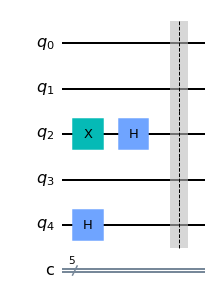

Eve measures  1  qubits
Circuit after Eve eavesdrops:


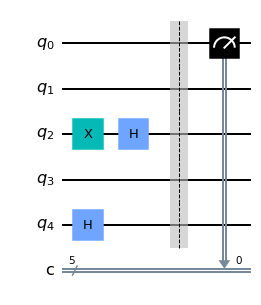

Circuit after Bob completes decoding and measurement


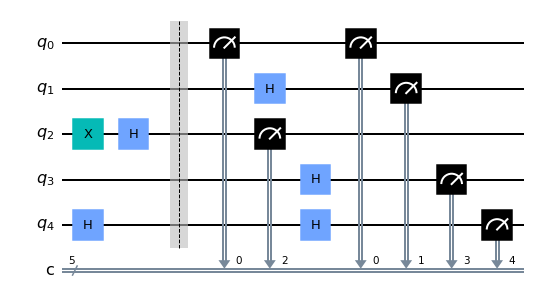

 Alice bits: [0 0 1 0 0] 
 Alice bases: [0 0 1 0 1] 
 Eve bases: [0, -999, -999, -999, -999] 
 Bob bases: [0 1 0 1 1] 
 Bob bits: [0, 0, 1, 0, 0]
 Agreed base indices: [0, 4]
 Test indices are:  [0, 4]
 The QBER on test indices is  0.0


0.0

In [4]:
BB84(TOTAL_BITS=5,EAVESDROPPED_BITS_RATE=0.2,TEST_BITS_RATE=0.5,DISPLAY_CIRCUIT=True,DEBUG=True)

### Calculate avergage QBER on test key for various eavesdropping rates

In [5]:
MAX_ITER = 100
N = [10, 20, 50, 100]

In [5]:
AVG_TEST_QBER_E0p5_T0p5 = []

for n in N:
    print(" Running on TOTAL_BITS = ", n)
    TEST_QBER = []
    for i in range(MAX_ITER):
        error = BB84(TOTAL_BITS=n,EAVESDROPPED_BITS_RATE=0.5,TEST_BITS_RATE=0.5)
        TEST_QBER.append(error)
    AVG_TEST_QBER_E0p5_T0p5.append(np.mean(TEST_QBER))
print(AVG_TEST_QBER_E0p5_T0p5)

 Running on TOTAL_BITS =  10
 Running on TOTAL_BITS =  20
 Running on TOTAL_BITS =  50
 Running on TOTAL_BITS =  100
[0.18, 0.2154206349206349, 0.18356904078034106, 0.17350167356352553]


In [6]:
AVG_TEST_QBER_E0p2_T0p5 = []

for n in N:
    print(" Running on TOTAL_BITS = ", n)
    TEST_QBER = []
    for i in range(MAX_ITER):
        error = BB84(TOTAL_BITS=n,EAVESDROPPED_BITS_RATE=0.2,TEST_BITS_RATE=0.5)
        TEST_QBER.append(error)
    AVG_TEST_QBER_E0p2_T0p5.append(np.mean(TEST_QBER))
print(AVG_TEST_QBER_E0p2_T0p5)

 Running on TOTAL_BITS =  10
 Running on TOTAL_BITS =  20
 Running on TOTAL_BITS =  50
 Running on TOTAL_BITS =  100
[0.0845, 0.09439682539682538, 0.07699011527687999, 0.0711283326871166]


In [6]:
AVG_TEST_QBER_E0p7_T0p5 = []

for n in N:
    print(" Running on TOTAL_BITS = ", n)
    TEST_QBER = []
    for i in range(MAX_ITER):
        error = BB84(TOTAL_BITS=n,EAVESDROPPED_BITS_RATE=0.7,TEST_BITS_RATE=0.5)
        TEST_QBER.append(error)
    AVG_TEST_QBER_E0p7_T0p5.append(np.mean(TEST_QBER))
print(AVG_TEST_QBER_E0p7_T0p5)

 Running on TOTAL_BITS =  10
 Running on TOTAL_BITS =  20
 Running on TOTAL_BITS =  50
 Running on TOTAL_BITS =  100
[0.2796666666666667, 0.2782222222222222, 0.25244984182484176, 0.2497810968488899]


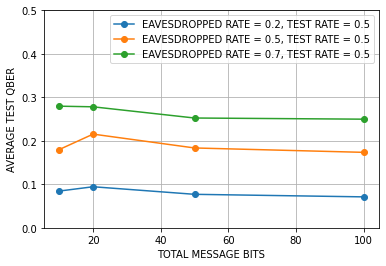

In [9]:
plt.plot(N,AVG_TEST_QBER_E0p2_T0p5,"-o",label="EAVESDROPPED RATE = 0.2, TEST RATE = 0.5")
plt.plot(N,AVG_TEST_QBER_E0p5_T0p5,"-o",label="EAVESDROPPED RATE = 0.5, TEST RATE = 0.5")
plt.plot(N,AVG_TEST_QBER_E0p7_T0p5,"-o",label="EAVESDROPPED RATE = 0.7, TEST RATE = 0.5")
plt.ylim(0,0.5)
plt.grid()
plt.legend()
plt.xlabel("TOTAL MESSAGE BITS")
plt.ylabel("AVERAGE TEST QBER")
plt.show()

In [7]:
# AVG_TEST_QBER_E0p5_T0p5 = [0.18, 0.2154206349206349, 0.18356904078034106, 0.17350167356352553]
# AVG_TEST_QBER_E0p2_T0p5 = [0.0845, 0.09439682539682538, 0.07699011527687999, 0.0711283326871166]
# AVG_TEST_QBER_E0p7_T0p5 = [0.2796666666666667, 0.2782222222222222, 0.25244984182484176, 0.2497810968488899]